In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

In [21]:
digits = datasets.load_digits() # 加载数据

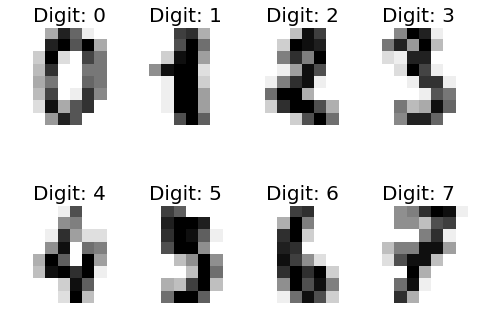

In [22]:
# 把数据所代表的图片显示出来
images_and_labels = list(zip(digits.images, digits.target))
plt.figure(figsize=(8, 6), dpi=200)
for index, (image, label) in enumerate(images_and_labels[:8]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Digit: %i' % label, fontsize=20)

In [23]:
print("shape of raw image data: {0}".format(digits.images.shape))
print("shape of data: {0}".format(digits.data.shape))

shape of raw image data: (1797, 8, 8)
shape of data: (1797, 64)


In [24]:
# 把数据分成训练数据集和测试数据集
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(digits.data, digits.target, test_size=0.20, random_state=2);

In [25]:
# 使用支持向量机来训练模型
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100., probability=True)
clf.fit(Xtrain, Ytrain);

In [26]:
# 评估模型的准确度
from sklearn.metrics import accuracy_score
Ypred = clf.predict(Xtest);
accuracy_score(Ytest, Ypred)

0.97777777777777775

In [27]:
clf.score(Xtest, Ytest)

0.97777777777777775

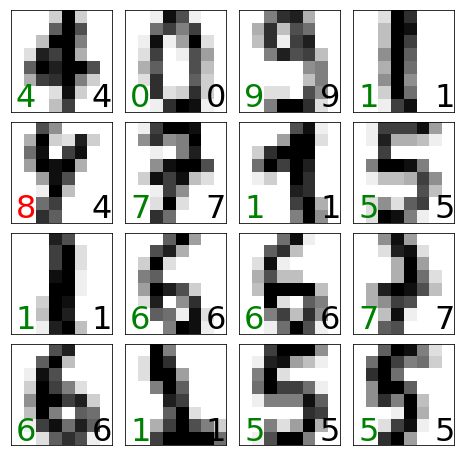

In [28]:
# 查看预测的情况
fig, axes = plt.subplots(4, 4, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(Xtest[i].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.text(0.05, 0.05, str(Ypred[i]), fontsize=32,
            transform=ax.transAxes,
            color='green' if Ypred[i] == Ytest[i] else 'red')
    ax.text(0.8, 0.05, str(Ytest[i]), fontsize=32,
            transform=ax.transAxes,
            color='black')
    ax.set_xticks([])
    ax.set_yticks([])

In [29]:
# Xtest[4] 的各种可能性
clf.predict_proba(Xtest[4].reshape(1, -1))

array([[ 0.00448546,  0.02391122,  0.01574738,  0.01128528,  0.03207432,
         0.03084909,  0.00492786,  0.16602092,  0.56699315,  0.14370532]])

In [30]:
# 保存模型参数
from sklearn.externals import joblib
joblib.dump(clf, 'digits_svm.pkl');

In [31]:
# 导入模型参数，直接进行预测
clf = joblib.load('digits_svm.pkl')
Ypred = clf.predict(Xtest);
clf.score(Xtest, Ytest)

0.97777777777777775